In [3]:
# import necessary libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

In [4]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [6]:
# parameters
std  = 2
sampsize = 41
xBars = np.linspace(-2,2,41)

# initialize results vector
powers = np.zeros(len(xBars))

# run the experiment
for i,xm in enumerate(xBars):
  powers[i] = smp.TTestPower().power(effect_size=xm/std, nobs=sampsize, alpha=.05)


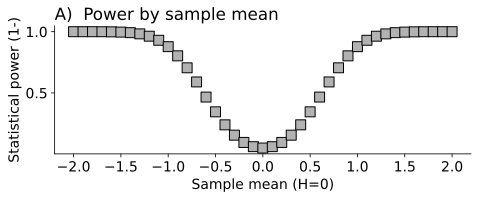

In [7]:
# plot
plt.figure(figsize=(7,3))
plt.plot(xBars,powers,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.xlabel(r'Sample mean (H=0)')
plt.ylabel(r'Statistical power (1-)')
plt.title(r'A)  Power by sample mean')

# display the figure
plt.tight_layout()
plt.show()
     